In [1]:
#Many Thanks for https://www.youtube.com/watch?v=QIUxPv5PJOY&t=326s

In [2]:
#import packge
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

/Users/howard/opt/anaconda3/lib/python3.7/site-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal
Using TensorFlow backend.


In [3]:
#Get the Stock quote
df = web.DataReader('GOOGL',data_source='yahoo',start='2010-01-01',end='2020-04-27')
#show the data
df.head(3)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-01-04,315.070068,312.432434,313.788788,313.688690,3908400.0,313.688690
2010-01-05,314.234222,311.081085,313.903900,312.307312,6003300.0,312.307312
2010-01-06,313.243256,303.483490,313.243256,304.434448,7949400.0,304.434448


In [4]:
#show the shape of the data
df.shape

(2596, 6)

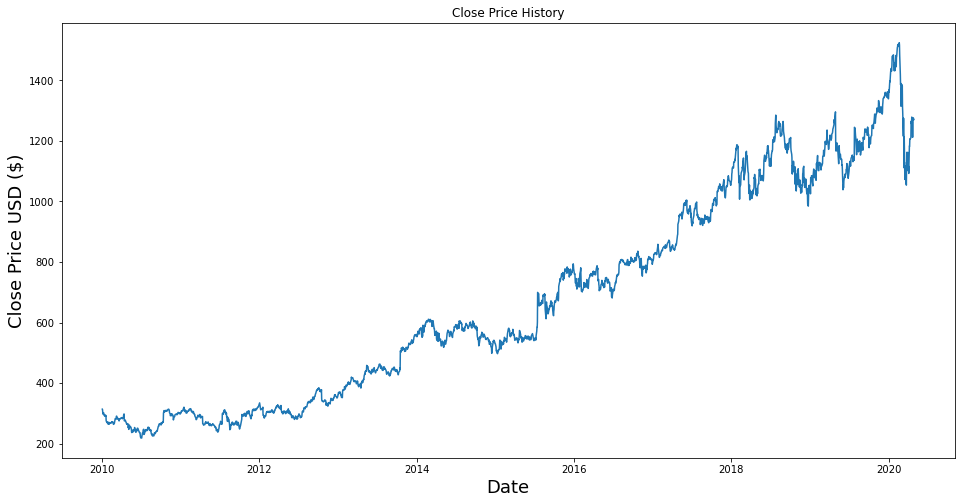

In [5]:
#Visualize the colsing price history of Google
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD ($)',fontsize=18)
plt.show()

In [6]:
#Create a new dataframe with the "Close" column
data = df.filter(['Close'])
#Convert the dataframe to a numpy array
dataset = data.values
#Get the number of rows to train the model on
training_data_len = math.ceil(len(dataset)*0.8)

training_data_len

2077

In [7]:
#Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.07304012],
       [0.0719829 ],
       [0.06595752],
       ...,
       [0.80583446],
       [0.80999017],
       [0.80559716]])

In [8]:
#Create the training data set
#Create the scaled training data set
train_data = scaled_data[0:training_data_len , :]
#Split the data into x_train and y_trian data sets
x_train = []
y_train = []

for i in range(60,len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<=60:
        print(x_train)
        print(y_train)
        print()

[array([0.07304012, 0.0719829 , 0.06595752, 0.06053351, 0.06356727,
       0.0632187 , 0.05914686, 0.05784832, 0.05890554, 0.05513249,
       0.05805133, 0.05528954, 0.05627398, 0.0436448 , 0.03981046,
       0.04073744, 0.04061487, 0.03762325, 0.03595697, 0.03713676,
       0.03640898, 0.04012458, 0.03474654, 0.0364741 , 0.03730915,
       0.03844681, 0.03768453, 0.03843149, 0.03717507, 0.04030844,
       0.03912479, 0.0410439 , 0.04010159, 0.040883  , 0.03792202,
       0.03654305, 0.03461247, 0.0347542 , 0.03701036, 0.04021651,
       0.04184829, 0.04539917, 0.04908413, 0.04842144, 0.04754425,
       0.05377267, 0.05556918, 0.05495629, 0.04868957, 0.04946334,
       0.04960123, 0.04992301, 0.04747147, 0.04651385, 0.04325793,
       0.04644873, 0.04857466, 0.04850188, 0.04840995, 0.05004175])]
[0.05019879906017061]



In [9]:
#Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [10]:
#Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(2017, 60, 1)

In [11]:
#Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape = (x_train.shape[1],1)))
model.add(LSTM(50, return_sequences= False))
model.add(Dense(25))
model.add(Dense(1))

In [12]:
#Compilb the model
model.compile(optimizer='adam', loss ='mean_squared_error')

In [13]:
#Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

Epoch 1/1
2017/2017 [==============================] - 63s 31ms/step - loss: 7.1580e-04


In [14]:
#Create the testing data set
#Create a new array containing scaled values from 
test_data = scaled_data[training_data_len - 60:, :]
#Create the data set x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    

In [15]:
#Convert the data to a numpy array
x_test = np.array(x_test)

In [16]:
#Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [17]:
#Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [18]:
#Get the root mean squared error(RMSE)
rmse =np.sqrt(np.mean(((predictions- y_test)**2)))
rmse

34.59669827571547

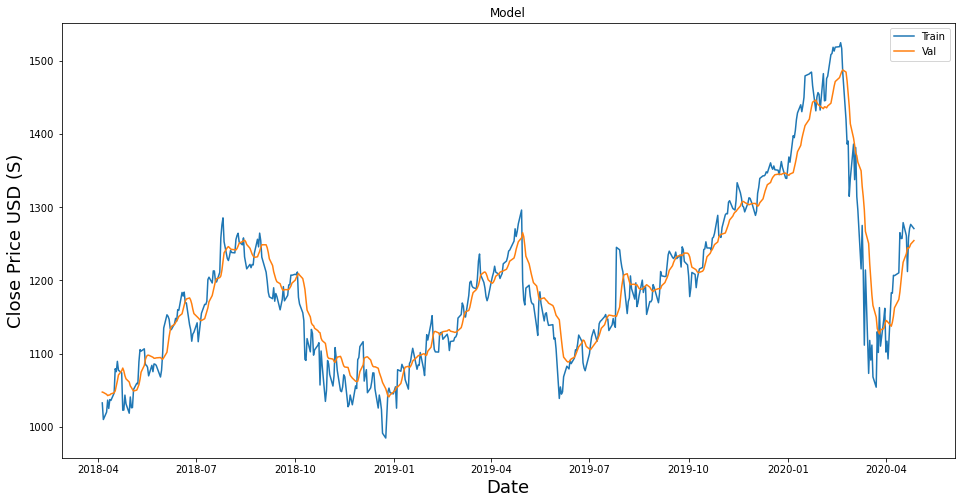

In [19]:
#Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Prediction'] = predictions
#Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD (S)',fontsize=18)
plt.plot(valid[['Close','Prediction']])
plt.legend(['Train','Val','Predction'],loc = 'low right')
plt.show()

In [20]:
valid

,Close,Prediction
Date,,
2018-04-05,1032.640015,1047.481201
2018-04-06,1009.950012,1046.944458
2018-04-09,1020.090027,1044.403931
2018-04-10,1036.500000,1042.670410
2018-04-11,1025.060059,1043.389038
...,...,...
2020-04-21,1212.160034,1244.521240
2020-04-22,1258.410034,1243.802856
2020-04-23,1271.170044,1245.680786


In [21]:
#Get the qutoe
apple_quote = web.DataReader('GOOGL', data_source='yahoo',start='2010-01-01',end='2020-04-27')
#Create a new dataframe
new_df = apple_quote.filter(['Close'])
#Get teh last 60 day closing price values and convert the dataframe to an array
last_60_days = new_df[-60:].values
#Scale the data to be values between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)
#Create an empty list
X_test = []
#Append teh past 60 days
X_test.append(last_60_days_scaled)
#Convert tje X_test data set tp a numpy array
X_test = np.array(X_test)
#Reshape the data
pred_price = model.predict(X_test)
#udo the scaling
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[[1258.4567]]


In [22]:
#Get the qutoe
apple_quote2 = web.DataReader('GOOGL', data_source='yahoo',start='2020-04-28',end='2020-04-28')
print(apple_quote2['Close'])

Date
2020-04-28    1232.589966
Name: Close, dtype: float64
